<a href="https://colab.research.google.com/github/faizanurrahman/competition_datascience/blob/master/Statistical_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hypothesis Testing Steps
- Described hypothesis in word. Hypothesis can be either describe using papulation parameter such as mean, variance, standard deviation(**Parametric Hypothesis**) or decribed using whole data 

In [0]:
#from google.colab import files
#files.upload()
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!ls ~/.kaggle
#from google.colab import drive
#drive.mount('/content/drive')
#!ls -l ~/.kaggle
#!cat ~/.kaggle/kaggle.json
#!pip install -q kaggle
#!pip install -q kaggle-cli
#a = !kaggle competitions list -p 100--csv
#!pip uninstall -y kaggle
#!pip install --upgrade pip
#!pip install kaggle==1.5.6
#!kaggle -v

#file = zipfile.ZipFile('/content/melbourne-housing-market.zip', 'r')
##file.extractall()
#file.close()
#a!ls
#!kaggle config set -p /content/drive/My Drive/.kaggle




Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faizanurrahmann","key":"583d21a01ae8f62900aeface2bff67b1"}'}

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%cd /content/drive/My\ Drive/.kaggle/
!ls

/content/drive/My Drive/.kaggle
kaggle_challenge  kaggle.json


In [0]:
!mkdir kaggle_challenge
%cd ./kaggle_challenge
!ls

/content/drive/My Drive/.kaggle/kaggle_challenge


In [0]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "faizanurrahmann" # username from the json file 
os.environ['KAGGLE_KEY'] = "583d21a01ae8f62900aeface2bff67b1" # key from the json file 
#!kaggle datasets download -d iarunava/happy-house-dataset # api copied from kaggle

In [0]:
!kaggle competitions list


In [0]:
#%cd ./kaggle_challenge/
!kaggle datasets download -d anthonypino/melbourne-housing-market
!ls

In [0]:
import zipfile
file = zipfile.ZipFile('melbourne-housing-market.zip', 'r')
file.extractall()
file.close()

In [0]:
!ls

MELBOURNE_HOUSE_PRICES_LESS.csv  melbourne-housing-market.zip
Melbourne_housing_FULL.csv


In [0]:
import pandas as pd
import numpy as np
from scipy import stats

In [0]:
data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [0]:
data.shape

(63023, 13)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [0]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [0]:
numerical_feature = ['Rooms', 'Price', 'Propertycount', 'Distance']
categorical_fearure = [x for x in data.columns if x not in numerical_feature]
print(f'numerical feature {numerical_feature}')
print(f'categorical_feature {categorical_fearure}')


numerical feature ['Rooms', 'Price', 'Propertycount', 'Distance']
categorical_feature ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'CouncilArea']


In [0]:
numerical_data = data[numerical_feature]
categorical_data = data[categorical_fearure]
print(numerical_data.head())
print(categorical_data.head())

   Rooms      Price  Propertycount  Distance
0      3  1490000.0           4019       3.0
1      3  1220000.0           4019       3.0
2      3  1420000.0           4019       3.0
3      3  1515000.0           1543       7.5
4      2   670000.0           3464      10.4
         Suburb  ...                 CouncilArea
0    Abbotsford  ...          Yarra City Council
1    Abbotsford  ...          Yarra City Council
2    Abbotsford  ...          Yarra City Council
3    Aberfeldie  ...  Moonee Valley City Council
4  Airport West  ...  Moonee Valley City Council

[5 rows x 9 columns]


In [0]:
data.Type.value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [0]:
data.Regionname.value_counts()

In [0]:
groupby_region = data.groupby('Regionname')
for region, value in groupby_region:
  print(region, value.mean())

In [0]:
groupby_postcode = data.groupby('Postcode')
for postcode, value in groupby_postcode:
  print(postcode, value.mean())

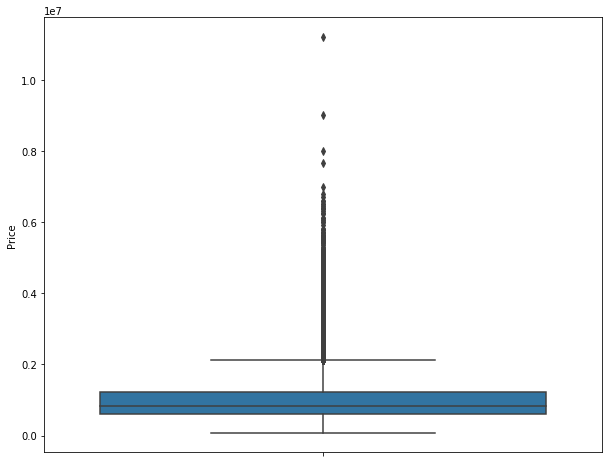

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib.inline
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Price', data = data, orient='v')

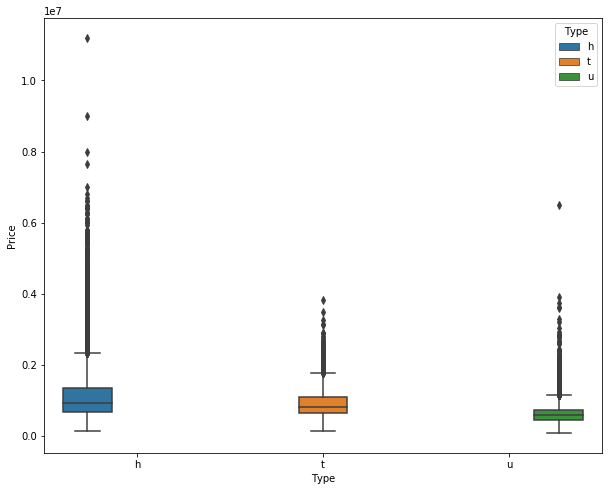

In [63]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x = 'Type', y = 'Price', hue='Type', data = data, orient = 'v')

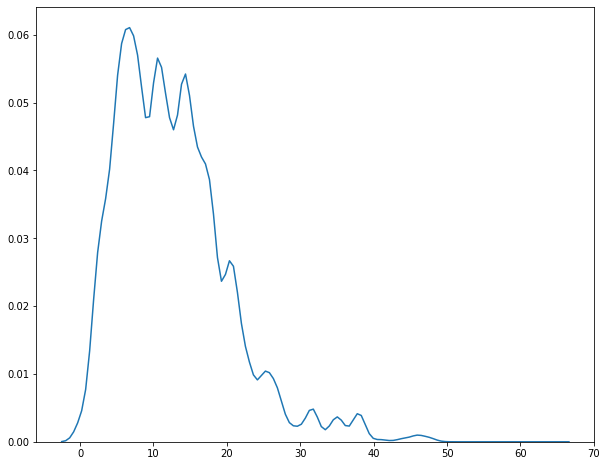

In [70]:
filter_data = data.dropna(subset = ['Distance'])
plt.figure(figsize=(10, 8))
sns.distplot(filter_data[['Distance']], kde=True, hist = False)

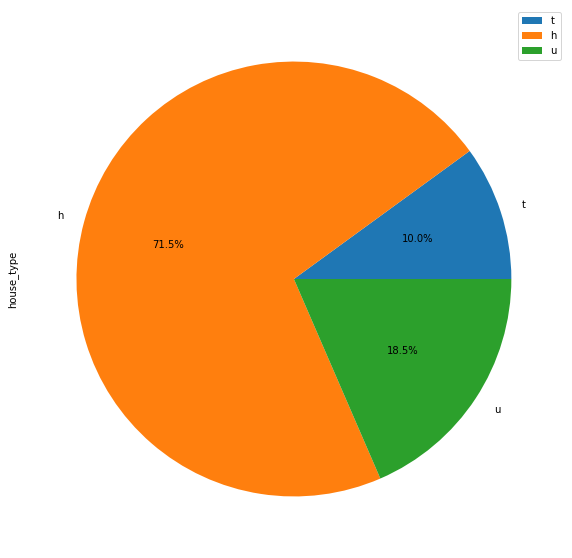

In [72]:

type_counts = data['Type'].value_counts()
df2 = pd.DataFrame({'house_type': type_counts}, 
                     index = ['t', 'h', 'u']
                   )
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

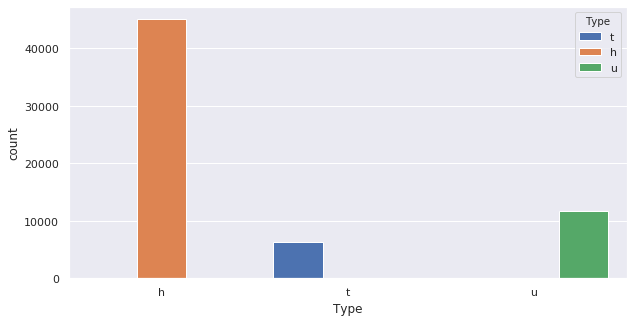

In [80]:

sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Type', data=data, hue='Type', hue_order=['t', 'h', 'u'], orient='v', saturation=1.1)

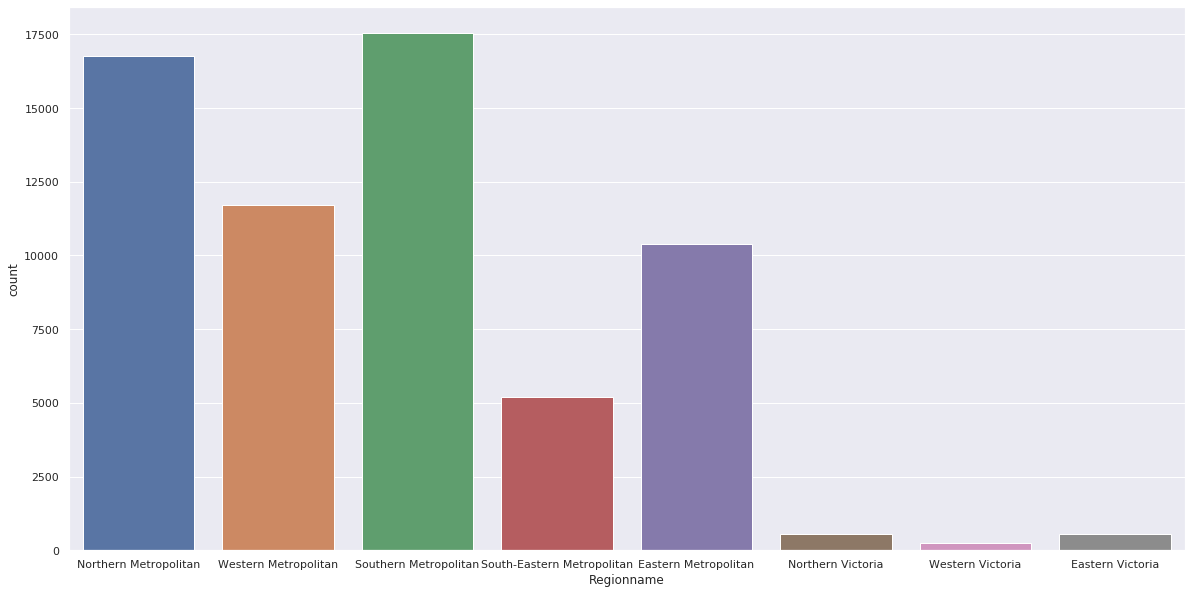

In [83]:

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Regionname', data=data)

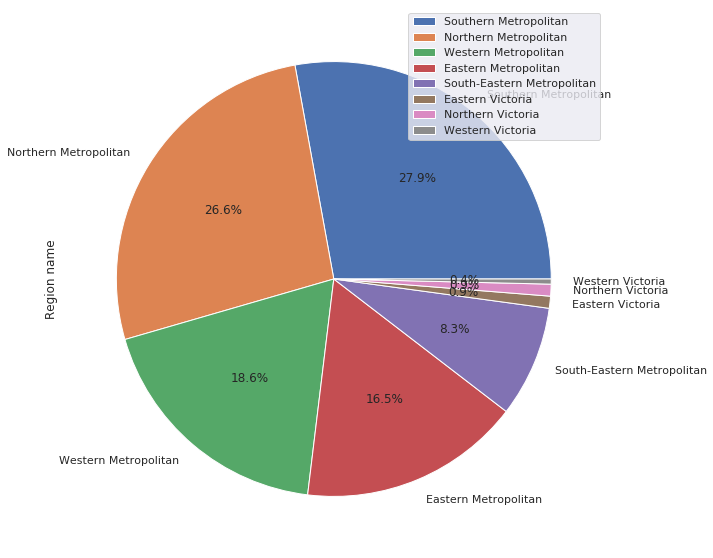

In [90]:
df = data['Regionname'].value_counts()
df2 = pd.DataFrame({"Region name":df})
df2.plot.pie(y='Region name', figsize=(20, 10), autopct='%1.1f%%')

In [95]:
# T test
filter_price = data.dropna(subset =['Price'])
price_house = data.Price.mean()
ttest, pval = stats.ttest_1samp(filter_price.Price, price_house)
if pval<0.5:
  print(f"We reject Null Hypothesis: ttest:{ttest}, pval:{pval}")
else:
  print(f"We retaining the null hypothesis, ttest:{ttest}, pval:{pval}")


We retaining the null hypothesis, ttest:0.0, pval:1.0


In [98]:
# Paired ttest
filter_data = data.dropna(subset=['Price', 'Distance'])
ttest, pval = stats.ttest_ind(filter_data.Price, filter_data.Distance)
if pval<0.5:
  print("Reject:", ttest, pval)
else:
  print("Retan: ", ttest, pav)

Reject: 370.0253532411727 0.0


In [100]:
from statsmodels.stats import weightstats as stests
zval, pval = stests.ztest(x1 = filter_data.Price, x2 = None, value = 25000)
print(zval, pval)

360.7598281888286 0.0


In [102]:
plant_df = pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/PlantGrowth.csv')
plant_df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [104]:
df_anova = plant_df[['weight','group']]
grps = pd.unique(df_anova.group.values)
print("grps", grps)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
print("d_data", d_data)
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

grps ['ctrl' 'trt1' 'trt2']
d_data {'ctrl': 0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64, 'trt1': 10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64, 'trt2': 20    6.31
21    5.12
22    5.54
23    5.50
24    5.37
25    5.29
26    4.92
27    6.15
28    5.80
29    5.26
Name: weight, dtype: float64}
p-value for significance is:  0.0159099583256229
reject null hypothesis


In [105]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


In [108]:
df_chi = pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv')
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2
Observed Values :-
 [[2 3]
 [2 2]]
Expected Values :-
 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]
Degree of Freedom:- 1
chi-square statistic:- 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
